### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 7
### Due: Friday, Oct 20 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw7_data.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

# 1 import data
data = np.load('hw7_data.npy')
meas = data[:,0]
sigma = data[:,1] 
# Compute the sample mean and standard error

def mean(x, sigma):
    mu_hat = (sum(x/sigma**2))/(sum(1/sigma**2))
    return mu_hat

muhat = mean(meas, sigma)
print(muhat, "is the sample mean.")

standard_error = np.std(meas, ddof=1) / np.sqrt(len(meas))
print(standard_error, "is the standard error on the sample mean.")

4.942118214425304 is the sample mean.
0.32838053806183115 is the standard error on the sample mean.


2.8072507799196864
4.9421182131077375 is the best-fit mean.


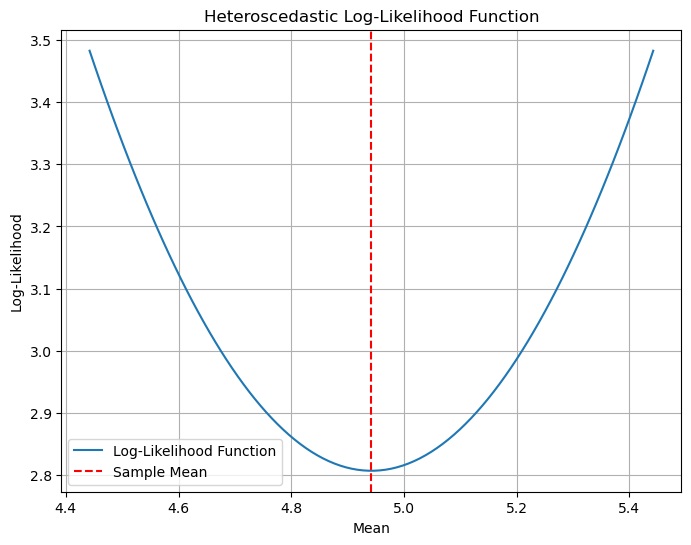

In [2]:
# 2. Fit the appropriate ln-Likelihood function and find the best-fit mean voltage
# Write a ln-likelihood function for heteroscedastic data
def lnLikelihood(x, mu, sigma):
    lnL = -sum(((x-mu)**2)/(2*sigma**2))
    return -lnL
lnL = lnLikelihood(meas, muhat, sigma)
print(lnL)
# Use it in a fitting algorithm to find the best-fit mean

mu_proposed = np.mean(meas)
result = scipy.optimize.minimize(lnLikelihood, mu_proposed, args=(meas, sigma))

mu_max = result.x[0]
print(mu_max, "is the best-fit mean.")

# Define a range of mean values to evaluate the likelihood
mean_range = np.linspace(muhat - 0.5, muhat + 0.5, 100) 

# Calculate the log-likelihood for each mean value
log_likelihood_values = np.zeros_like(mean_range)
for i, mean in enumerate(mean_range):
    log_likelihood_values[i] = lnLikelihood(mean, meas, sigma)

# Plot the likelihood function
plt.figure(figsize=(8, 6))
plt.plot(mean_range, log_likelihood_values, label="Log-Likelihood Function")
plt.xlabel("Mean")
plt.ylabel("Log-Likelihood")
plt.title("Heteroscedastic Log-Likelihood Function")
plt.axvline(muhat, color='red', linestyle='--', label="Sample Mean")
plt.legend()
plt.grid(True)

plt.show()

Text(0.5, 1.0, 'Posterior Probability Density')

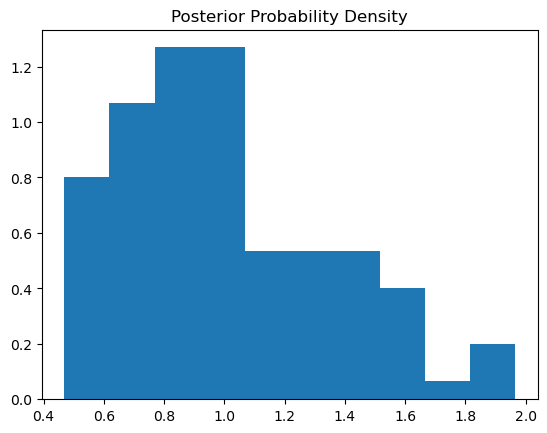

In [3]:
# 3. Compute and plot the Bayesian posterior probability density (not the log posterior) 
# for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. 
# Make sure this posterior pdf is normalized!
# Calculate the evidence (marginal likelihood)

likelihood_values = np.exp(log_likelihood_values)
prior = np.random.uniform(3, 7, len(log_likelihood_values))
evidence = np.trapz(likelihood_values * prior, mean_range) 

# Calculate the normalized posterior 
posterior = (1 / evidence) * likelihood_values * prior

plt.hist(posterior, density = True)
plt.title("Posterior Probability Density")

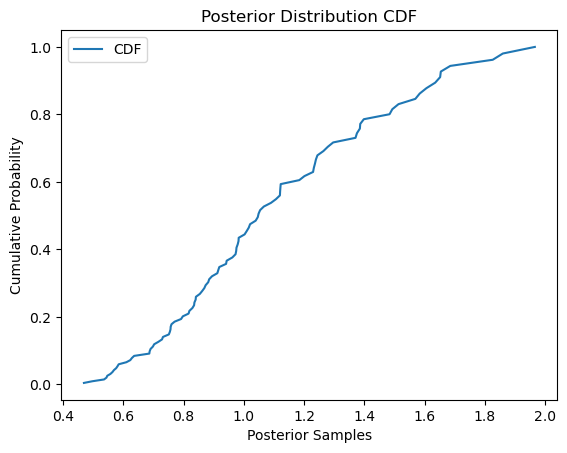

In [4]:
# 4. find the equal-tailed 68.3% credible region for the mean

# Create CDF
sorted_samples = np.sort(posterior)
cumulative_prob = np.cumsum(sorted_samples) / np.sum(sorted_samples)

# Plot CDF
plt.plot(sorted_samples, cumulative_prob, label='CDF')
plt.xlabel('Posterior Samples')
plt.ylabel('Cumulative Probability')
plt.title('Posterior Distribution CDF')
plt.legend()
plt.show()

In [5]:
# Calculate the percentiles using CDF
lower_bound = np.percentile(mean_range, 15.85, method='lower')
upper_bound = np.percentile(mean_range, 84.15, method='higher')

print("68.3% Credible Interval for the Posterior:", (lower_bound, upper_bound))

# Compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively.

print("Lower:", lower_bound, "vs", muhat - standard_error)
print("Upper:", upper_bound, "vs", muhat + standard_error)

68.3% Credible Interval for the Posterior: (4.593633365940455, 5.290603062910153)
Lower: 4.593633365940455 vs 4.613737676363473
Upper: 5.290603062910153 vs 5.270498752487135


68.3% Credible Interval for the Posterior: (4.593633365940455, 5.290603062910153)
Lower: 4.593633365940455 vs 4.613737676363473
Upper: 5.290603062910153 vs 5.270498752487135


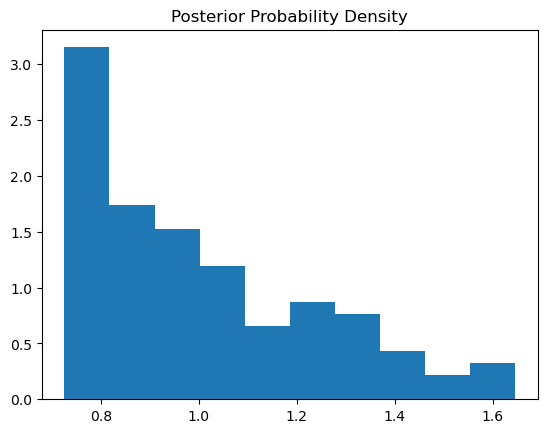

In [6]:
# 5. Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 
likelihood_values2 = np.exp(log_likelihood_values)
prior2 = np.random.uniform(4.6, 5.4, len(log_likelihood_values))
evidence2 = np.trapz(likelihood_values2 * prior2, mean_range) 

# Calculate the normalized posterior 
posterior2 = (1 / evidence2) * likelihood_values2 * prior2

plt.hist(posterior2, density = True)
plt.title("Posterior Probability Density")

# Create CDF
sorted_samples2 = np.sort(posterior2)
cumulative_prob2 = np.cumsum(sorted_samples2) / np.sum(sorted_samples2)

# Calculate the percentiles using CDF
lower_bound2 = np.percentile(mean_range, 15.85, method='lower')
upper_bound2 = np.percentile(mean_range, 84.15, method='higher')

print("68.3% Credible Interval for the Posterior:", (lower_bound2, upper_bound2))

# Compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively.

print("Lower:", lower_bound2, "vs", muhat - standard_error)
print("Upper:", upper_bound2, "vs", muhat + standard_error)

68.3% Credible Interval for the Posterior: (4.593633365940455, 5.290603062910153)
Lower: 4.593633365940455 vs 4.613737676363473
Upper: 5.290603062910153 vs 5.270498752487135


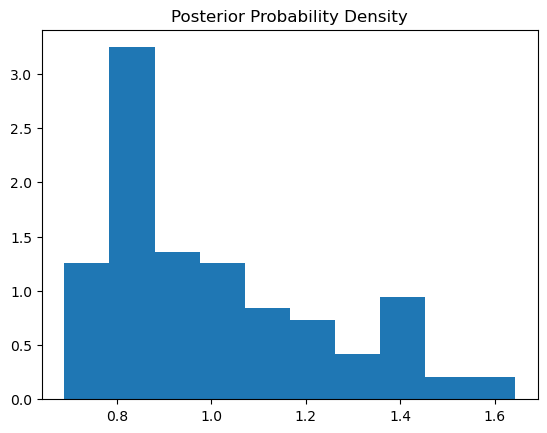

In [7]:
# 6. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at 6 with standard deviation of 0.3
likelihood_values3 = np.exp(log_likelihood_values)
prior3 = np.random.normal(6, 0.3, len(log_likelihood_values))
evidence3 = np.trapz(likelihood_values3 * prior3, mean_range) 

# Calculate the normalized posterior 
posterior3 = (1 / evidence3) * likelihood_values3 * prior3

plt.hist(posterior3, density = True)
plt.title("Posterior Probability Density")

# Create CDF
sorted_samples3 = np.sort(posterior3)
cumulative_prob3 = np.cumsum(sorted_samples3) / np.sum(sorted_samples3)

# Calculate the percentiles using CDF
lower_bound3 = np.percentile(mean_range, 15.85, method='lower')
upper_bound3 = np.percentile(mean_range, 84.15, method='higher')

print("68.3% Credible Interval for the Posterior:", (lower_bound3, upper_bound3))

# Compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively.

print("Lower:", lower_bound3, "vs", muhat - standard_error)
print("Upper:", upper_bound3, "vs", muhat + standard_error)

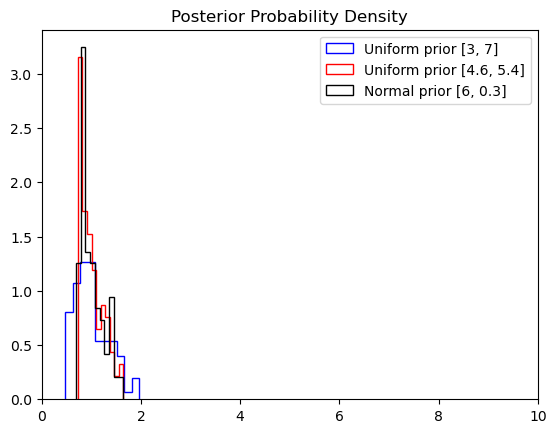

In [8]:
# 7. Plot all of the normalized posterior pdfs for 𝜇 from (3), (5), and (6) on the same plot
# making sure that the xlim of the plot spans 0 to 10.

plt.xlim(0,10)
plt.hist(posterior, density = True, histtype='step', color='blue', label = "Uniform prior [3, 7]")
plt.hist(posterior2, density = True,histtype='step', color='red', label = "Uniform prior [4.6, 5.4]")
plt.hist(posterior3, density = True,histtype='step', color='black', label = "Normal prior [6, 0.3]")
plt.title("Posterior Probability Density")
plt.legend()
plt.show()

With delta function prior: Evidence = 104.71840841437862
With uniform prior [3,7]: Evidence = 106.54803446113499


Text(0.5, 1.0, 'Posterior Probability Density')

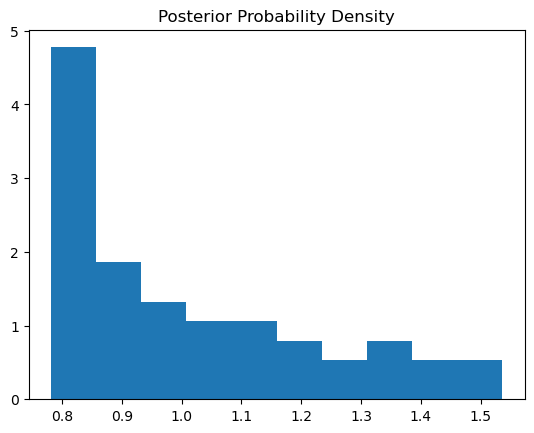

In [9]:
# 8.
likelihood_values = np.exp(log_likelihood_values)
prior_delta = np.random.normal(muhat, 0, len(log_likelihood_values))
evidence_delta = np.trapz(likelihood_values * prior_delta, mean_range) 

# Compare to the evidence found in (3)
print("With delta function prior: Evidence =", evidence_delta)
print("With uniform prior [3,7]: Evidence =", evidence)

# Calculate the normalized posterior 
posterior_delta = (1 / evidence_delta) * likelihood_values * prior_delta

plt.hist(posterior_delta, density = True)
plt.title("Posterior Probability Density")

 # Taking ratios to make a Bayes factor, which model is favored?
Baye's factor: a ratio of likelihoods
Here, the likelihoods are the same since the lnL comes from a fit from the data, so the Baye's factor is 1. It is the Odd's ratio that carries more information. Taking the ratio of the posterior dependent on the delta prior to the posterior dependent on the uniform prior, we get:



In [10]:
odds = posterior_delta/posterior

print(np.mean(odds))


1.0667524132221575


According to Jefferys, an Odds Factor between 1 and three shows a slight favor of the delta prior. Occam's Razor also supports the use of the delta function prior, as the Odds Factor is very nearly 1.